In [1]:
from transformers import AutoModel, BertTokenizerFast
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
# Import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Loading DistilBert Model

In [2]:
from transformers import DistilBertTokenizer, DistilBertModel
# Load the DistilBert tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Import the DistilBert pretrained model
bert = DistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [320]:
text = ["this is a distil bert model.","data is oil"]
# Encode the text
encoded_input = tokenizer(text, padding=True,truncation=True, return_tensors='pt')
print(encoded_input)

{'input_ids': tensor([[  101,  2023,  2003,  1037,  4487, 16643,  2140, 14324,  2944,  1012,
           102],
        [  101,  2951,  2003,  3514,   102,     0,     0,     0,     0,     0,
             0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])}


# Customers Questions for training 

In [3]:
import numpy as np
import pandas as pd
import re
import torch
import random
import torch.nn as nn
import transformers
import matplotlib.pyplot as plt
# specify GPU
device = torch.device('cpu')

In [63]:
# df=pd.read_csv('Customer Questions.csv')
# DF= df.drop('Unnamed: 2',axis=1)

df=pd.read_csv('MORE DATA.csv')
DF= df.drop('Unnamed: 2',axis=1)
DF

,Question,Label
0,What is the price of the item?,Price
1,In which color item is available?,Color
2,In which size the item is available?,Size
3,What is the best supplier of the item?,Supplier name
4,What is the cost of the item?,Item price
...,...,...
3108,How can I order a product not listed on your w...,Q42
3109,Do you provide educational resources or produc...,Q43
3110,How do I contact customer service outside norm...,Q44
3111,Are additional fees or taxes added to my purch...,Q45


In [64]:
temp = pd.read_csv('Neo4jQUERY.csv')
c = temp['field'].tolist()
c.remove('Demo Video'); c.remove('Weight')

In [65]:
c

['Description',
 'Price',
 'Color',
 'Size',
 'Supplier Stores',
 'Accessories',
 'Delivery Time',
 'Warranty',
 'Specifications',
 'Installments',
 'Discounts',
 'expesive_mobile',
 'average_price',
 'cheapest_mobile',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q32',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42',
 'Q43',
 'Q44',
 'Q45',
 'Q46']

In [66]:
temp =[]
l1 = DF['Label'].to_list()
for i in l1:
    try:
        temp.append(i.strip())
    except:
        temp.append('')

In [67]:
DF['col'] = temp

In [68]:
DF

,Question,Label,col
0,What is the price of the item?,Price,Price
1,In which color item is available?,Color,Color
2,In which size the item is available?,Size,Size
3,What is the best supplier of the item?,Supplier name,Supplier name
4,What is the cost of the item?,Item price,Item price
...,...,...,...
3108,How can I order a product not listed on your w...,Q42,Q42
3109,Do you provide educational resources or produc...,Q43,Q43
3110,How do I contact customer service outside norm...,Q44,Q44
3111,Are additional fees or taxes added to my purch...,Q45,Q45


In [69]:
DF = DF[DF['col'].isin(c)]

In [70]:
DF['col'].value_counts()

Size               221
Price              180
Color              175
Warranty           158
Accessories        148
Delivery Time      129
Discounts          116
Specifications     111
Description        110
Supplier Stores    100
Installments        76
Q2                  38
Q4                  38
Q3                  38
Q5                  38
Q1                  36
Q43                 18
Q26                 18
Q28                 18
Q29                 18
Q30                 18
Q31                 18
Q45                 18
Q32                 18
Q33                 18
Q34                 18
Q35                 18
Q36                 18
Q37                 18
Q38                 18
Q39                 18
Q40                 18
Q41                 18
Q42                 18
Q24                 18
Q44                 18
Q25                 18
Q17                 18
Q23                 18
Q13                 18
Q6                  18
Q7                  18
Q8                  18
Q9         

## To convert these categorical labels into numerical encodings we are using the LabelEncoder.

In [71]:
#DF['Label']
# Converting the labels into encodings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
DF['col'] = le.fit_transform(DF['col'])
# check class distribution
DF['col'].value_counts(normalize = True)

C:\Users\A1D\AppData\Local\Temp/ipykernel_6952/1000924053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['col'] = le.fit_transform(DF['col'])


53    0.089041
6     0.072522
1     0.070508
56    0.063658
0     0.059629
2     0.051974
4     0.046737
54    0.044722
3     0.044319
55    0.040290
5     0.030620
18    0.015310
40    0.015310
29    0.015310
48    0.015310
7     0.014504
44    0.007252
25    0.007252
27    0.007252
28    0.007252
30    0.007252
31    0.007252
46    0.007252
32    0.007252
33    0.007252
34    0.007252
35    0.007252
36    0.007252
37    0.007252
38    0.007252
39    0.007252
41    0.007252
42    0.007252
43    0.007252
23    0.007252
45    0.007252
24    0.007252
15    0.007252
22    0.007252
11    0.007252
49    0.007252
50    0.007252
51    0.007252
52    0.007252
8     0.007252
21    0.007252
10    0.007252
9     0.007252
12    0.007252
13    0.007252
14    0.007252
16    0.007252
17    0.007252
19    0.007252
20    0.007252
47    0.006446
59    0.005641
57    0.005641
58    0.005238
26    0.004432
Name: col, dtype: float64

In [72]:
len(set(DF['col'].tolist()))

60

#### Train Data and Train labels

In [73]:
# In this example we have used all the utterances for training purpose
train_text, train_labels = DF['Question'], DF['col']

In [74]:
train_labels

0        6
1        1
2       53
5        6
6        1
        ..
3108    43
3109    44
3110    45
3111    46
3112    47
Name: col, Length: 2482, dtype: int32

In [75]:
len(set(train_labels.tolist()))

60

In [76]:
DF

,Question,Label,col
0,What is the price of the item?,Price,6
1,In which color item is available?,Color,1
2,In which size the item is available?,Size,53
5,Can you tell me the price for this product?,Price,6
6,What colors are available for this item?,Color,1
...,...,...,...
3108,How can I order a product not listed on your w...,Q42,43
3109,Do you provide educational resources or produc...,Q43,44
3110,How do I contact customer service outside norm...,Q44,45
3111,Are additional fees or taxes added to my purch...,Q45,46


In [77]:
#set(df['Label'].tolist())

## FIND CLASS WEIGHTS

In [78]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
#compute the class weights
print(train_labels)
print(type(train_labels))
class_wts = compute_class_weight('balanced', np.unique(train_labels), train_labels.to_numpy())
print(class_wts)

0        6
1        1
2       53
5        6
6        1
        ..
3108    43
3109    44
3110    45
3111    46
3112    47
Name: col, Length: 2482, dtype: int32
<class 'pandas.core.series.Series'>
[0.2795045  0.23638095 0.32067183 0.37606061 0.3566092  0.54429825
 0.22981481 1.14907407 2.29814815 2.29814815 2.29814815 2.29814815
 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815
 1.08859649 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815
 2.29814815 2.29814815 3.76060606 2.29814815 2.29814815 1.08859649
 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815
 2.29814815 2.29814815 2.29814815 2.29814815 1.08859649 2.29814815
 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815 2.58541667
 1.08859649 2.29814815 2.29814815 2.29814815 2.29814815 0.18717949
 0.37267267 0.41366667 0.26181435 2.9547619  3.18205128 2.9547619 ]


C:\Users\A1D\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59], y=[ 6  1 53 ... 45 46 47] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [79]:
len(train_labels)

2482

In [80]:
len(set(train_labels))

60

In [81]:
import torch

In [82]:
text = ["this is a distil bert model.","data is oil"]
# Encode the text
encoded_input = tokenizer(text, padding=True,truncation=True, return_tensors='pt')
print(encoded_input)

{'input_ids': tensor([[  101,  2023,  2003,  1037,  4487, 16643,  2140, 14324,  2944,  1012,
           102],
        [  101,  2951,  2003,  3514,   102,     0,     0,     0,     0,     0,
             0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])}


In [83]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)
# loss function
cross_entropy = nn.NLLLoss(weight=weights) 

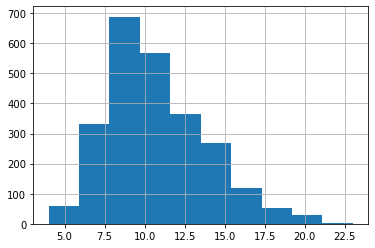

In [84]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]
pd.Series(seq_len).hist(bins = 10)
# Based on the histogram we are selecting the max len as 8
max_seq_len = 8

In [85]:
#train_text.to_list()

In [86]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

C:\Users\A1D\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [87]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())



In [88]:
print(len(train_seq))
print(len(train_y))
print(train_seq)

2482
2482
tensor([[  101,  2054,  2003,  ...,  1997,  1996,   102],
        [  101,  1999,  2029,  ...,  2003,  2800,   102],
        [  101,  1999,  2029,  ...,  8875,  2003,   102],
        ...,
        [  101,  2129,  2079,  ...,  8013,  2326,   102],
        [  101,  2024,  3176,  ...,  7773,  2794,   102],
        [  101,  2054,  2003,  ...,  2005, 17542,   102]])


In [89]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
#define a batch size
batch_size = 1000
# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)
# DataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [90]:
class BERT_Arch(nn.Module):
   def __init__(self, bert):      
       super(BERT_Arch, self).__init__()
       self.bert = bert 
      
       # dropout layer
       self.dropout = nn.Dropout(0.2)
      
       # relu activation function
       self.relu =  nn.ReLU()
       # dense layer
       self.fc1 = nn.Linear(768,512)
       self.fc2 = nn.Linear(512,256)
       self.fc3 = nn.Linear(256,60)
       #softmax activation function
       self.softmax = nn.LogSoftmax(dim=1)
       #define the forward pass
   def forward(self, sent_id, mask):
      #pass the inputs to the model  
      cls_hs = self.bert(sent_id, attention_mask=mask)[0][:,0]
      
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      
      x = self.fc2(x)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc3(x)
   
      # apply softmax activation
      x = self.softmax(x)
      return x

In [91]:
#!pip install torchinfo

In [92]:
# freeze all the parameters. This will prevent updating of model weights during fine-tuning.
for param in bert.parameters():
      param.requires_grad = False
model = BERT_Arch(bert)
# push the model to CPU
model = model.to(device)
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
BERT_Arch                                               --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              (23,440,896)
│    │    └─Embedding: 3-2                              (393,216)
│    │    └─LayerNorm: 3-3                              (1,536)
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             (42,527,232)
├─Dropout: 1-2                                          --
├─ReLU: 1-3                                             --
├─Linear: 1-4                                           393,728
├─Linear: 1-5                                           131,328
├─Linear: 1-6                                           15,420
├─LogSoftmax: 1-7                                       --
Total

# optimizer

In [93]:
from transformers import AdamW
# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

C:\Users\A1D\anaconda3\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [94]:
from sklearn.utils.class_weight import compute_class_weight
#compute the class weights
print(train_labels)
class_wts = compute_class_weight('balanced', np.unique(train_labels), train_labels)
print(class_wts)
print("len of wts: ", len(class_wts))

0        6
1        1
2       53
5        6
6        1
        ..
3108    43
3109    44
3110    45
3111    46
3112    47
Name: col, Length: 2482, dtype: int32
[0.2795045  0.23638095 0.32067183 0.37606061 0.3566092  0.54429825
 0.22981481 1.14907407 2.29814815 2.29814815 2.29814815 2.29814815
 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815
 1.08859649 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815
 2.29814815 2.29814815 3.76060606 2.29814815 2.29814815 1.08859649
 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815
 2.29814815 2.29814815 2.29814815 2.29814815 1.08859649 2.29814815
 2.29814815 2.29814815 2.29814815 2.29814815 2.29814815 2.58541667
 1.08859649 2.29814815 2.29814815 2.29814815 2.29814815 0.18717949
 0.37267267 0.41366667 0.26181435 2.9547619  3.18205128 2.9547619 ]
len of wts:  60


C:\Users\A1D\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59], y=0        6
1        1
2       53
5        6
6        1
        ..
3108    43
3109    44
3110    45
3111    46
3112    47
Name: col, Length: 2482, dtype: int32 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# Balancing the weights while calculating the error

In [95]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)
# loss function
cross_entropy = nn.NLLLoss(weight=weights) 

# Setting up the epochs

In [96]:
# empty lists to store training and validation loss of each epoch
train_losses=[]
# number of training epochs
epochs = 250
# We can also use learning rate scheduler to achieve better results
lr_sch = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

# Fine Tune the model

In [97]:
# function to train the model
def train():

    model.train()
    total_loss = 0

    # empty list to save model predictions
    total_preds=[]

    # iterate over batches
    for step,batch in enumerate(train_dataloader):

        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
          print('  Batch {:>5,}  of  {:>5,}.'.format(step,    len(train_dataloader)))
        # push the batch to gpu
        batch = [r.to(device) for r in batch] 
        sent_id, mask, labels = batch
        #print("sent_id", sent_id)
        #print("labels:", labels)
        # get model predictions for the current batch
        preds = model(sent_id, mask)
        # compute the loss between actual and predicted values
        
#         print(preds)
#         print(type(preds))
#         print("length of labels: ", len(labels))
#         print("labels: ",labels)
        
        loss = cross_entropy(preds, labels)
        # add on to the total loss
        total_loss = total_loss + loss.item()
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the    exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # clear calculated gradients
        optimizer.zero_grad()

        # We are not using learning rate scheduler as of now
        # lr_sch.step()
        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()
        # append the model predictions
        total_preds.append(preds)
        # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)
    #returns the loss and predictions
    return avg_loss, total_preds

# Start model training

In [98]:
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    # append training and validation loss
    train_losses.append(train_loss)
    # it can make your experiment reproducible, similar to set  random seed to all options where there needs a random seed.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f'\nTraining Loss: {train_loss:.3f}')


 Epoch 1 / 250

Training Loss: 4.092

 Epoch 2 / 250

Training Loss: 4.060

 Epoch 3 / 250

Training Loss: 4.016

 Epoch 4 / 250

Training Loss: 3.928

 Epoch 5 / 250

Training Loss: 3.828

 Epoch 6 / 250

Training Loss: 3.678

 Epoch 7 / 250

Training Loss: 3.491

 Epoch 8 / 250

Training Loss: 3.300

 Epoch 9 / 250

Training Loss: 3.091

 Epoch 10 / 250

Training Loss: 2.885

 Epoch 11 / 250

Training Loss: 2.700

 Epoch 12 / 250

Training Loss: 2.528

 Epoch 13 / 250

Training Loss: 2.356

 Epoch 14 / 250

Training Loss: 2.176

 Epoch 15 / 250

Training Loss: 2.060

 Epoch 16 / 250

Training Loss: 1.959

 Epoch 17 / 250

Training Loss: 1.808

 Epoch 18 / 250

Training Loss: 1.752

 Epoch 19 / 250

Training Loss: 1.655

 Epoch 20 / 250

Training Loss: 1.549

 Epoch 21 / 250

Training Loss: 1.465

 Epoch 22 / 250

Training Loss: 1.422

 Epoch 23 / 250

Training Loss: 1.340

 Epoch 24 / 250

Training Loss: 1.299

 Epoch 25 / 250

Training Loss: 1.214

 Epoch 26 / 250

Training Loss: 1


Training Loss: 0.249

 Epoch 210 / 250

Training Loss: 0.230

 Epoch 211 / 250

Training Loss: 0.229

 Epoch 212 / 250

Training Loss: 0.248

 Epoch 213 / 250

Training Loss: 0.243

 Epoch 214 / 250

Training Loss: 0.232

 Epoch 215 / 250

Training Loss: 0.239

 Epoch 216 / 250

Training Loss: 0.220

 Epoch 217 / 250

Training Loss: 0.243

 Epoch 218 / 250

Training Loss: 0.233

 Epoch 219 / 250

Training Loss: 0.228

 Epoch 220 / 250

Training Loss: 0.222

 Epoch 221 / 250

Training Loss: 0.235

 Epoch 222 / 250

Training Loss: 0.233

 Epoch 223 / 250

Training Loss: 0.222

 Epoch 224 / 250

Training Loss: 0.228

 Epoch 225 / 250

Training Loss: 0.233

 Epoch 226 / 250

Training Loss: 0.224

 Epoch 227 / 250

Training Loss: 0.215

 Epoch 228 / 250

Training Loss: 0.216

 Epoch 229 / 250

Training Loss: 0.221

 Epoch 230 / 250

Training Loss: 0.223

 Epoch 231 / 250

Training Loss: 0.224

 Epoch 232 / 250

Training Loss: 0.218

 Epoch 233 / 250

Training Loss: 0.232

 Epoch 234 / 250


In [99]:
###Generating Testing Data

## storing data in pickel file

In [102]:
import pickle
# assume your trained model is named "model"
with open('DarazChat.pkl', 'wb') as f:
    pickle.dump(model, f)

In [158]:
#loading the model
import pickle
with open('DarazChat.pkl', 'rb') as f:
    model = pickle.load(f)

# Test Data For the model

In [104]:
# test_df = pd.read_csv('testdata.csv')
# test_df

# Loading Response File

In [107]:
import pandas as pd
response = pd.read_csv('Responses.csv')

In [108]:
response.drop('Unnamed: 2',axis=1)

,tag,message
0,Item price,According to my data price of this item is:
1,Price,According to my data price of this item is:
2,Item color,According to my data item is available in the...
3,Item size,According to my data the item is available in...
4,Supplier name,Here are names of few suppliers of this items
...,...,...
81,Q42,if you're interested in ordering a product th...
82,Q43,we understand that customers may have questio...
83,Q44,we understand that our customers may need ass...
84,Q45,As a representative of our ecommerce website ...


In [109]:
# coverting data into dictionary
tag = response['tag'].tolist()
msg = response['message'].tolist()

from collections import defaultdict
RES = defaultdict(list)

for i,j in zip(tag,msg):
    RES[i].append(j)


In [110]:
RES

defaultdict(list,
            {'Item price': [' According to my data price of this item is:'],
             'Price': [' According to my data price of this item is:'],
             'Item color': [' According to my data item is available in the following color:'],
             'Item size': [' According to my data the item is available in the following size:'],
             'Supplier name': [' Here are names of few suppliers of this items'],
             'Color': [' The item is available in the following color:'],
             'Size': [' The item is available in the following size:'],
             'Chart': [' No data about item chart is available'],
             'Accessories': [' Information about item accessories:'],
             'Delivery details': [' Here are the delivery details:  '],
             'Material': [' Item material details:'],
             'Life span': [' item life span details:'],
             'Availability': [' According to my data:'],
             'Compatibility': [' Ite

# predictions for test data

In [111]:
def get_prediction(str):
 str = re.sub(r'[^a-zA-Z ]+', '', str)
 test_text = [str]
 model.eval()
 
 tokens_test_data = tokenizer(
 test_text,
 max_length = max_seq_len,
 pad_to_max_length=True,
 truncation=True,
 return_token_type_ids=False
 )
 test_seq = torch.tensor(tokens_test_data['input_ids'])
 test_mask = torch.tensor(tokens_test_data['attention_mask'])
 
 preds = None
 with torch.no_grad():
   preds = model(test_seq.to(device), test_mask.to(device))
 preds = preds.detach().cpu().numpy()
 preds = np.argmax(preds, axis = 1)
 print("PREDS: ", preds)
 print('Intent Identified:', le.inverse_transform(preds)[0])
 return le.inverse_transform(preds)[0]
def get_response(message, item=''): 
  intent = get_prediction(message).strip()
  try:
      result = random.choice(RES[intent])
  except:
      result = 'No Data'
  print(f"Response : {result}")

  return "Intent: "+ intent + '\n' + "Response: " + result


In [354]:
RES['Returns']

[]

In [112]:
get_response('what is the size of this imte?')

PREDS:  [53]
Intent Identified: Size
Response :  The item is available in the following size:


C:\Users\A1D\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


'Intent: Size\nResponse:  The item is available in the following size:'

In [113]:
get_response('what is delivery time for the product?')

PREDS:  [49]
Intent Identified: Q6
Response : You will receive your digital goods on the registered email address within 24hrs. Physical items mostly take 2-3 days for delivery.


'Intent: Q6\nResponse: You will receive your digital goods on the registered email address within 24hrs. Physical items mostly take 2-3 days for delivery.'

## Flask

In [171]:
from flask import Flask, request, render_template
import re
import random
import torch
import numpy as np

app = Flask(__name__)


In [172]:
@app.route('/', methods=['GET', 'POST'])
def home():
    if request.method == 'POST':
        message = request.form['message']
        intent = get_prediction(message).strip()
        try:
            result = random.choice(RES[intent])
        except:
            result = 'No Data'
        return render_template('result.html', intent=intent, result=result)
    return render_template('index.html')


In [173]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [ ]:
%tb

In [180]:
@app.route('/')

def hello2():
    return 'helloworld'

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [291]:
import pandas as pd
import os

current_dir = os.getcwd()
folder_name = 'KnowledgeBase' 
file_name = 'smartphones.csv'
file_path = os.path.join(current_dir, folder_name, file_name)

print(file_path)

C:\Users\A1D\Desktop\NLP\NLP ASSIGNMENT 4\KnowledgeBase\smartphones.csv


In [292]:
df=pd.read_csv(file_path,sep='^')

In [293]:
df

,Product Name,Description,Price,Color,Size,Supplier Stores,Accessories,Delivery Time,Demo Video,Warranty,Specifications,Weight,Installments,Discounts
0,Samsung Galaxy A52,The Samsung Galaxy A52 is a mid-range smartpho...,$399,Awesome Black,128GB,Best Buy Walmart Amazon,Charging Cable Earphones,2 days,Yes,1 year,4500mAh battery 6.5-inch display 6GB RAM 128GB...,189g,Available,10%
1,iPhone SE (2020),The iPhone SE (2020) is a budget-friendly smar...,$399,White,64GB,Apple Store AT&T Verizon,Charging Cable Earpods,3 days,Yes,1 year,1821mAh battery 4.7-inch display 3GB RAM 64GB ...,148g,Not available,No discount
2,OnePlus 9 Pro,The OnePlus 9 Pro is a flagship smartphone wit...,$969,Morning Mist,256GB,OnePlus Store T-Mobile Amazon,Charging Cable Earbuds,3 days,Yes,2 years,4500mAh battery 6.7-inch display 12GB RAM 256G...,197g,Available,10%
3,Xiaomi Mi 11 Lite,The Xiaomi Mi 11 Lite is a sleek and slim smar...,$349,Truffle Black,128GB,Xiaomi Store Best Buy Amazon,Charging Cable,4 days,No,1 year,4250mAh battery 6.55-inch display 6GB RAM 128G...,159g,Available,15%
4,Samsung Galaxy Z Flip 3,The Samsung Galaxy Z Flip 3 is a foldable smar...,$999,Cream,256GB,Best Buy AT&T Samsung Store,Charging Cable Leather Cover,2 days,Yes,1 year,3300mAh battery 6.7-inch display 8GB RAM 256GB...,183g,Not available,No discount
5,Motorola Moto G Power (2022),The Motorola Moto G Power (2022) is a budget-f...,$249,Aurora Grey,64GB,Best Buy Walmart Amazon,Charging Cable,5 days,No,1 year,5000mAh battery 6.6-inch display 4GB RAM 64GB ...,206g,Available,10%
6,iPhone 13 mini,The iPhone 13 mini is a compact yet powerful s...,$699,Starlight,128GB,Apple Store AT&T Verizon,Charging Cable Earpods,3 days,Yes,2 years,2406mAh battery 5.4-inch display 4GB RAM 128GB...,135g,Not available,No discount
7,Samsung Galaxy M32,The Samsung Galaxy M32 is a mid-range smartpho...,"34,999",Light Blue,128GB,Daraz.pk Homeshopping.pk Samsung Store,Charging Cable Earphones,2 days,Yes,1 year,5000mAh battery 6.4-inch display 4GB RAM 128GB...,196g,Available,10%
8,Oppo A54,The Oppo A54 is a budget-friendly smartphone w...,"26,999",Crystal Black,128GB,Daraz.pk Oppo Store Homeshopping.pk,Charging Cable Earbuds,3 days,Yes,1 year,5000mAh battery 6.51-inch display 4GB RAM 128G...,190g,Available,15%
9,Realme 8 Pro,The Realme 8 Pro is a mid-range smartphone wit...,"39,999",Infinite Blue,128GB,Daraz.pk Realme Store Homeshopping.pk,Charging Cable Earphones,2 days,Yes,1 year,4500mAh battery 6.4-inch display 8GB RAM 128GB...,176g,Available,12%


In [294]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"
user = "neo4j"
password = "12345678"

driver = GraphDatabase.driver(uri, auth=(user, password))


In [295]:
from neo4j import GraphDatabase
import pandas as pd

# Connect to the Neo4j database
uri = "bolt://localhost:7687"
user = "neo4j"
password = "12345678"
driver = GraphDatabase.driver(uri, auth=(user, password))

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path, sep='^')

# Create a Neo4j session
with driver.session() as session:
    
    # Create product nodes
    for index, row in df.iterrows():
        print(row)
        product_name = row["Product Name"]
        description = row["Description"]
        price = row["Price"]
        color = row["Color"]
        size = row["Size"]
        supplier_stores = row["Supplier Stores"]
        accessories = row["Accessories"]
        delivery_time = row["Delivery Time"]
        demo_video = row["Demo Video"]
        warranty = row["Warranty"]
        specifications = row["Specifications"]
        weight = row["Weight"]
        installments = row["Installments"]
        discounts = row["Discounts"]

        query = (
            "CREATE (:Product {"
            "product_name: $product_name, "
            "description: $description, "
            "price: $price, "
            "color: $color, "
            "size: $size, "
            "supplier_stores: $supplier_stores, "
            "accessories: $accessories, "
            "delivery_time: $delivery_time, "
            "demo_video: $demo_video, "
            "warranty: $warranty, "
            "specifications: $specifications, "
            "weight: $weight, "
            "installments: $installments, "
            "discounts: $discounts"
            "})"
        )

        session.run(query, parameters={
            "product_name": product_name,
            "description": description,
            "price": price,
            "color": color,
            "size": size,
            "supplier_stores": supplier_stores,
            "accessories": accessories,
            "delivery_time": delivery_time,
            "demo_video": demo_video,
            "warranty": warranty,
            "specifications": specifications,
            "weight": weight,
            "installments": installments,
            "discounts": discounts
        })

    # Create relationships between products
    query = (
        "MATCH (p1:Product), (p2:Product) "
        "WHERE p1.product_name <> p2.product_name "
        "AND p1.supplier_stores = p2.supplier_stores "
        "CREATE (p1)-[:SameSupplier]->(p2)"
    )

    session.run(query)


Product Name                                      Samsung Galaxy A52
Description        The Samsung Galaxy A52 is a mid-range smartpho...
Price                                                           $399
Color                                                  Awesome Black
Size                                                           128GB
Supplier Stores                              Best Buy Walmart Amazon
Accessories                                 Charging Cable Earphones
Delivery Time                                                 2 days
Demo Video                                                       Yes
Warranty                                                      1 year
Specifications     4500mAh battery 6.5-inch display 6GB RAM 128GB...
Weight                                                          189g
Installments                                               Available
Discounts                                                        10%
Name: 0, dtype: object
Product Nam

Product Name                         Samsung 65-inch Q70A QLED 4K TV
Description        The Samsung 65-inch Q70A QLED 4K TV is a high-...
Price                                                        299,999
Color                                                          Black
Size                                                         65-inch
Supplier Stores                        Samsung Store Best Buy Amazon
Accessories                     One Remote, power cable, user manual
Delivery Time                                                10 days
Demo Video                                                        No
Warranty                                                     2 years
Specifications     Quantum Processor 4K, 4K UHD resolution, HDR10...
Weight                                                        24.5kg
Installments                                               Available
Discounts                                                        15%
Name: 22, dtype: object
Product Na

# Data retrival

In [296]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "12345678"
driver = GraphDatabase.driver(uri, auth=(user, password))


In [297]:
query = "MATCH (n:Label) RETURN n"
with driver.session() as session:
    result = session.run(query)

In [299]:
# for record in result:
#     node = record.get('n')
#     node_properties = dict(node.items())
#     print(node_properties)


In [ ]:
driver.close()

## Extracting Data

In [300]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [30]:


text = "The Samsung Galaxy A52 is a mid-range smartphone with a 6.5-inch display and 5G connectivity. It comes in Awesome Black color and has 128GB of storage. The phone is available at Best Buy, Walmart, and Amazon for $399. The package includes a charging cable and earphones. The delivery time is 2 days and there is a demo video available. The phone comes with a 1-year warranty and its specifications include a 4500mAh battery, 6GB RAM, and 128GB storage. It weighs 189g and can be purchased in installments. There is a 10% discount available."

# Define the fields to extract
fields = ['Product Name', 'Description', 'Price', 'Color', 'Size', 'Supplier Stores', 'Accessories', 'Delivery Time', 'Demo Video', 'Warranty', 'Specifications', 'Weight', 'Installments', 'Discounts']

# Define empty dictionary to store the extracted values
extracted_info = {}

# Tokenize the input text
inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)

# Get the output of the BERT model
outputs = model(**inputs)

# Get the last hidden state of the token `[CLS]`
last_hidden_state = outputs.last_hidden_state

# Loop through each field and extract the corresponding value
for field in fields:
    # Define the start and end token indices for the current field
    start_token = tokenizer.encode('[CLS] ' + field + ': ')[1]
    end_token = tokenizer.encode(' [SEP]')[0]
    
    # Find the indices of the start and end tokens in the input text
    start_index = (inputs['input_ids'] == start_token).nonzero()[0][1]
    end_index = (inputs['input_ids'] == end_token).nonzero()[0][0]
    
    # Extract the value of the current field from the last hidden state
    value = last_hidden_state[0][start_index:end_index+1]
    
    # Convert the value to a string and remove the special tokens
    value = tokenizer.decode(torch.squeeze(value, dim=0))[len(field)+2:-1]
    
    # Add the extracted value to the dictionary
    extracted_info[field] = value

# Print the extracted information
print(extracted_info)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'Product Name': 'AD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [unused0] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

In [43]:
from transformers import pipeline

# load the pre-trained NER model
nlp = pipeline("ner", model="bert-base-cased")

# define the text to extract information from
text = "The Samsung Galaxy A52 is a mid-range smartphone with a 6.5-inch display and 5G connectivity. It costs $399 and comes in Awesome Black color with 128GB storage. It is available at Best Buy, Walmart, and Amazon. The package includes a charging cable and earphones. The delivery time is 2 days, and it comes with a 1-year warranty. The phone weighs 189g and has 6GB RAM."

# run the NER pipeline on the text
entities = nlp(text)

# define the fields to extract
fields = ["PRODUCT", "MONEY", "COLOR", "QUANTITY", "ORG", "TIME", "PRODUCT", "DATE", "WEIGHT"]

# loop through each entity in the entities list and extract the relevant fields
for ent in entities:
    print(ent)
    if ent["entity"] in fields:
        print(ent["word"], ent["entity"])


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

{'entity': 'LABEL_1', 'score': 0.5600646, 'index': 1, 'word': 'The', 'start': 0, 'end': 3}
{'entity': 'LABEL_1', 'score': 0.571916, 'index': 2, 'word': 'Samsung', 'start': 4, 'end': 11}
{'entity': 'LABEL_1', 'score': 0.5137913, 'index': 3, 'word': 'Galaxy', 'start': 12, 'end': 18}
{'entity': 'LABEL_1', 'score': 0.54312885, 'index': 4, 'word': 'A', 'start': 19, 'end': 20}
{'entity': 'LABEL_0', 'score': 0.627807, 'index': 5, 'word': '##5', 'start': 20, 'end': 21}
{'entity': 'LABEL_1', 'score': 0.61671275, 'index': 6, 'word': '##2', 'start': 21, 'end': 22}
{'entity': 'LABEL_1', 'score': 0.6624829, 'index': 7, 'word': 'is', 'start': 23, 'end': 25}
{'entity': 'LABEL_1', 'score': 0.64597094, 'index': 8, 'word': 'a', 'start': 26, 'end': 27}
{'entity': 'LABEL_1', 'score': 0.52369463, 'index': 9, 'word': 'mid', 'start': 28, 'end': 31}
{'entity': 'LABEL_1', 'score': 0.5569834, 'index': 10, 'word': '-', 'start': 31, 'end': 32}
{'entity': 'LABEL_1', 'score': 0.62266773, 'index': 11, 'word': 'range

In [148]:
import pandas as pd
pd.read_csv('Customer Questions.csv')

,Question,Label,Unnamed: 2
0,What is the price of the item?,Price,NaN
1,In which color item is available?,Color,NaN
2,In which size the item is available?,Size,NaN
3,What is the best supplier of the item?,Supplier name,NaN
4,What is the cost of the item?,Item price,NaN
...,...,...,...
363,What is the warranty that comes with this item?,Warranty,NaN
364,Can you tell me about the specifications of th...,Specifications,NaN
365,What is the weight of this product?,Weight,NaN
366,Is there an option to pay for this item in ins...,Installments,NaN


In [149]:
from transformers import pipeline, AutoTokenizer

# load the BERT-based NER model
nlp = pipeline("ner", model="bert-base-cased")

# load the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# define the text to extract information from
text = "The Samsung Galaxy A52 is a mid-range smartphone with a 6.5-inch display and 5G connectivity. It costs $399 and comes in Awesome Black color with 128GB storage. It is available at Best Buy, Walmart, and Amazon. The package includes a charging cable and earphones. The delivery time is 2 days, and it comes with a 1-year warranty. The phone weighs 189g and has 6GB RAM."

# define the fields to extract
fields = ["PRODUCT", "MONEY", "COLOR", "QUANTITY", "ORG", "TIME", "PRODUCT", "DATE", "WEIGHT"]

# tokenize the text using the BERT tokenizer
tokens = tokenizer(text, return_offsets_mapping=True, return_special_tokens_mask=True)

# run the NER model on the tokenized text
results = nlp(tokens)

# loop through each entity in the results and extract the relevant fields
for ent in results:
    if ent['entity'] in fields:
        start_offset = ent['start']
        end_offset = ent['end']
        word = text[start_offset:end_offset]
        print(word, ent['entity'])


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

ValueError: At least one input is required.

# Data Retrival

In [114]:
query = input('Enter the item')

KeyboardInterrupt: Interrupted by user

In [ ]:
# levanstine distance
df =pd.read_csv('smartphones.csv', sep='^')
phones = df['Product Name'].tolist()

def lev_distance(s, t):
    """Returns the Levenshtein distance between two strings."""
    m, n = len(s), len(t)
    d = [[0] * (n+1) for _ in range(m+1)]
    for i in range(m+1):
        d[i][0] = i
    for j in range(n+1):
        d[0][j] = j
    for i in range(1, m+1):
        for j in range(1, n+1):
            if s[i-1] == t[j-1]:
                d[i][j] = d[i-1][j-1]
            else:
                d[i][j] = 1 + min(d[i-1][j], d[i][j-1], d[i-1][j-1])
    return d[m][n]

def find_min_distance_item(lst, query):
    """Finds the item in a list that has the minimum Levenshtein distance to a query string."""
    min_distance = float('inf')
    min_item = None
    for item in lst:
        distance = lev_distance(query, item.lower())
        if distance < min_distance:
            min_distance = distance
            min_item = item
    return min_item


## specify item

In [ ]:
phone = 'google 5a'
ITEM = find_min_distance_item(phones, phone)
ITEM #item found

### neo4j queries

In [ ]:
Quries = pd.read_csv('Neo4JQUERY.csv')
Quries

In [360]:
INTENTS = Quries['field'].to_numpy()
QUERIES = Quries['query'].tolist()
INTENTS,QUERIES

(array(['Description', 'Price', 'Color', 'Size', 'Supplier Stores',
        'Accessories', 'Delivery Time', 'Demo Video', 'Warranty',
        'Specifications', 'Weight', 'Installments', 'Discounts'],
       dtype=object),
 ["MATCH (p:Product {product_name: 'xxx'}) RETURN p.description",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.price",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.color",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.size",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.supplier_stores",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.accessories",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.delivery_time",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.demo_video",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.warranty",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.specifications",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.weight",
  "MATCH (p:Product {product_name: 'xxx'}) RETURN p.installments",
  "M

In [361]:
## Retriving data from Neo4j QUERY
from neo4j import GraphDatabase
# Set up the connection to the Neo4j database
uri = "bolt://localhost:7687"
username = "neo4j"
password = "12345678"
driver = GraphDatabase.driver(uri, auth=(username, password))

In [362]:
with driver.session() as session:
    result = session.run(query)
    # Print the results
    #price = result.single()["p.price"]
    #price = result.single()[0]
    print(result)
    for record in result:
        print(record)

In [119]:
def get_prediction(str):
 str = re.sub(r'[^a-zA-Z ]+', '', str)
 test_text = [str]
 model.eval()
 
 tokens_test_data = tokenizer(
 test_text,
 max_length = max_seq_len,
 pad_to_max_length=True,
 truncation=True,
 return_token_type_ids=False
 )
 test_seq = torch.tensor(tokens_test_data['input_ids'])
 test_mask = torch.tensor(tokens_test_data['attention_mask'])
 
 preds = None
 with torch.no_grad():
   preds = model(test_seq.to(device), test_mask.to(device))
 preds = preds.detach().cpu().numpy()
 preds = np.argmax(preds, axis = 1)
 print("PREDS: ", preds)
 print('Intent Identified:', le.inverse_transform(preds)[0])
 return le.inverse_transform(preds)[0]
def get_response(message, item=''): 
    
  intent = get_prediction(message).strip()
  try:
      result = random.choice(RES[intent])
  except:
      result = 'No Data'
  print(f"Response : {result}")

  if intent in INTENTS:
        #levenstine dist
        ITEM = find_min_distance_item(phones, phone)
        
        if item == '':
            result = 'PLEASE ENTER THE ITEM AND SUBMIT QUERY AGAIN'
        
        c = int(np.where(INTENTS == intent)[0])

        q = QUERIES[c]
        
        q=q.replace('xxx',ITEM)
        print('query: ',q)
        
        #data retrival
        with driver.session() as session:
            temp = session.run(q)
            # Print the results
            #price = result.single()["p.price"]
            result = str(result) + ' ' + str(temp.single()[0])
        
  return "Intent: "+ intent + ' \n ' + "Response: " + result


In [ ]:
RES['Item price']

In [120]:
get_response('what is the color of this item?', 'google 5a')

PREDS:  [1]
Intent Identified: Color
Response :  The item is available in the following color:


NameError: name 'phone' is not defined

In [135]:
intent = 'Price'
import numpy as np


In [148]:
c = int(np.where(INTENTS == intent)[0])
c

1

In [151]:
q = QUERIES[c]

In [152]:
name = 'google phone'
q.replace('xxx',name)

"MATCH (p:Product {name: 'google phone'}) RETURN p.price"

In [215]:
INTENTS

array(['Item price', 'Description', 'Price', 'Color', 'Size',
       'Supplier Stores', 'Accessories', 'Delivery Time', 'Demo Video',
       'Warranty', 'Specifications', 'Weight', 'Installments',
       'Discounts', 'item price'], dtype=object)

# Testing

In [152]:
# from transformers import AutoModel, BertTokenizerFast
# # Load the BERT tokenizer
# tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
# # Import BERT-base pretrained model
# bert = AutoModel.from_pretrained('bert-base-uncased')
# from transformers import DistilBertTokenizer, DistilBertModel
# # Load the DistilBert tokenizer
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# # Import the DistilBert pretrained model
# bert = DistilBertModel.from_pretrained('distilbert-base-uncased')

from flask import Flask, request, render_template
import re
import random
import torch
import numpy as np
import pickle
import torch.nn as nn
import pandas as pd
import numpy as np


# levanstine distance
df =pd.read_csv('smartphones.csv', sep='^')
phones = df['Product Name'].tolist()

def lev_distance(s, t):
    """Returns the Levenshtein distance between two strings."""
    m, n = len(s), len(t)
    d = [[0] * (n+1) for _ in range(m+1)]
    for i in range(m+1):
        d[i][0] = i
    for j in range(n+1):
        d[0][j] = j
    for i in range(1, m+1):
        for j in range(1, n+1):
            if s[i-1] == t[j-1]:
                d[i][j] = d[i-1][j-1]
            else:
                d[i][j] = 1 + min(d[i-1][j], d[i][j-1], d[i-1][j-1])
    return d[m][n]

def find_min_distance_item(lst, query):
    """Finds the item in a list that has the minimum Levenshtein distance to a query string."""
    min_distance = float('inf')
    min_item = None
    for item in lst:
        distance = lev_distance(query, item.lower())
        if distance < min_distance:
            min_distance = distance
            min_item = item
    return min_item





max_seq_len = 8
device = torch.device('cpu')
import pandas as pd

#loading questions
df=pd.read_csv('MORE DATA.csv')
df= df.drop('Unnamed: 2',axis=1)

temp = pd.read_csv('Neo4jQUERY.csv')
c = temp['field'].tolist()
c.remove('Demo Video'); c.remove('Weight')
temp =[]
l1 = df['Label'].to_list()
for i in l1:
    try:
        temp.append(i.strip())
    except:
        temp.append('')

df['col'] = temp
df = df[df['col'].isin(c)]

# Converting the labels into encodings
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['col'] = Le.fit_transform(df['col'])
# check class distribution
#df['col'].value_counts(normalize = True)
print("inv col: ", Le.inverse_transform([56]))

#loading model responses

response = pd.read_csv('Responses.csv')
response.drop('Unnamed: 2',axis=1)
# coverting data into dictionary
tag = response['tag'].tolist()
msg = response['message'].tolist()



from collections import defaultdict
RES = defaultdict(list)

for i,j in zip(tag,msg):
    RES[i].append(j)



class BERT_Arch(nn.Module):
   def __init__(self, bert):      
       super(BERT_Arch, self).__init__()
       self.bert = bert 
      
       # dropout layer
       self.dropout = nn.Dropout(0.2)
      
       # relu activation function
       self.relu =  nn.ReLU()
       # dense layer
       self.fc1 = nn.Linear(768,512)
       self.fc2 = nn.Linear(512,256)
       self.fc3 = nn.Linear(256,60)
       #softmax activation function
       self.softmax = nn.LogSoftmax(dim=1)
       #define the forward pass
   def forward(self, sent_id, mask):
      #pass the inputs to the model  
      cls_hs = self.bert(sent_id, attention_mask=mask)[0][:,0]
      
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      
      x = self.fc2(x)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc3(x)
   
      # apply softmax activation
      x = self.softmax(x)
      return x

with open('DarazChat.pkl', 'rb') as f:
	model = pickle.load(f)

Quries = pd.read_csv('Neo4JQUERY.csv')
INTENTS = Quries['field'].to_numpy()
QUERIES = Quries['query'].tolist()
from neo4j import GraphDatabase
# Set up the connection to the Neo4j database
uri = "bolt://localhost:7687"
username = "neo4j"
password = "12345678"
driver = GraphDatabase.driver(uri, auth=(username, password))

def get_prediction(str):
 str = re.sub(r'[^a-zA-Z ]+', '', str)
 test_text = [str]
 model.eval()
 
 tokens_test_data = tokenizer(
 test_text,
 max_length = max_seq_len,
 pad_to_max_length=True,
 truncation=True,
 return_token_type_ids=False
 )
 test_seq = torch.tensor(tokens_test_data['input_ids'])
 test_mask = torch.tensor(tokens_test_data['attention_mask'])
 
 preds = None
 with torch.no_grad():
   preds = model(test_seq.to(device), test_mask.to(device))
 preds = preds.detach().cpu().numpy()
 preds = np.argmax(preds, axis = 1)
 print("PREDS: ", preds)
 print('Intent Identified:', Le.inverse_transform(preds)[0])
 return Le.inverse_transform(preds)[0]

def get_response(message,item=''): 
    intent = get_prediction(message).strip()
    try:
      result = random.choice(RES[intent])
    except:
      result = 'No Data'

    if intent in INTENTS:
      
      if intent in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46']:
            return result
      #levenstine dist
      ITEM = find_min_distance_item(phones, item)
      if item == '':
          result = 'PLEASE ENTER THE ITEM AND SUBMIT QUERY AGAIN'
          return result
      c = int(np.where(INTENTS == intent)[0])
      q = QUERIES[c]
      q=q.replace('xxx',ITEM)
      result = result.replace('item',ITEM)
      #data retrival
      with driver.session() as session:
        temp = session.run(q)
        result = str(result) + ' ' + str(temp.single()[0])
    return result

get_response('Is personal and payment information safe on your platform?')

inv col:  ['Warranty']
PREDS:  [9]
Intent Identified: Q11


C:\Users\A1D\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


" we take the security of our customers' personal and payment information very seriously. We use a variety of security measures to protect our website and the information you provide to us. We use SSL encryption to protect your personal and payment information during transmission and we do not store your payment information on our servers. We use a third-party payment processor that is PCI-compliant to handle all payment transactions which means your payment information is processed securely and in compliance with industry standards."

In [136]:
#loading questions
df=pd.read_csv('MORE DATA.csv')
df= df.drop('Unnamed: 2',axis=1)
df

,Question,Label
0,What is the price of the item?,Price
1,In which color item is available?,Color
2,In which size the item is available?,Size
3,What is the best supplier of the item?,Supplier name
4,What is the cost of the item?,Item price
...,...,...
3108,How can I order a product not listed on your w...,Q42
3109,Do you provide educational resources or produc...,Q43
3110,How do I contact customer service outside norm...,Q44
3111,Are additional fees or taxes added to my purch...,Q45


In [140]:
temp = pd.read_csv('Neo4jQUERY.csv')
c = temp['field'].tolist()
c.remove('Demo Video'); c.remove('Weight')
temp =[]
l1 = df['Label'].to_list()
for i in l1:
    try:
        temp.append(i.strip())
    except:
        temp.append('')
        
set(temp)

{'',
 'Accessories',
 'Additional Fees',
 'Additional Items',
 'Age/Gender specification',
 'Alternatives',
 'Assembly',
 'Assembly/Instruction',
 'Availability',
 'Availability and pricing',
 'Awards',
 'Battery Life',
 'Bulk order',
 'Capacity',
 'Care',
 'Care Instructions',
 'Case Studies',
 'Certification',
 'Chart',
 'Color',
 'Commercial Use',
 'Commercial/Industrial',
 'Compatibility',
 'Cost',
 'Customer support',
 'Customer support hours',
 'Customization',
 'Customization of product',
 'Delivery Time',
 'Delivery details',
 'Demo',
 'Demo Video',
 'Description',
 'Design/Styling',
 'Dimensions',
 'Discounts',
 'Durability',
 'Energy Consumption',
 'Environment',
 'Expedited Shipping',
 'Extended',
 'Features',
 'Financing Options',
 'Frequency',
 'Frequency/Wattage',
 'Guide',
 'Health',
 'Heft',
 'Hue Options',
 'Images',
 'Installation instructions',
 'Installments',
 'Instructions',
 'International',
 'International Shipping',
 'Item',
 'Item price',
 'Label',
 'Lead Time

In [141]:
import pandas as pd

#loading questions
df=pd.read_csv('MORE DATA.csv')
df= df.drop('Unnamed: 2',axis=1)

temp = pd.read_csv('Neo4jQUERY.csv')
c = temp['field'].tolist()
c.remove('Demo Video'); c.remove('Weight')
temp =[]
l1 = df['Label'].to_list()
for i in l1:
    try:
        temp.append(i.strip())
    except:
        temp.append('')

df['col'] = temp
df = df[df['col'].isin(c)]

set(df['col'].tolist())

{'Accessories',
 'Color',
 'Delivery Time',
 'Description',
 'Discounts',
 'Installments',
 'Price',
 'Q1',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q2',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q3',
 'Q30',
 'Q31',
 'Q32',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q4',
 'Q40',
 'Q41',
 'Q42',
 'Q43',
 'Q44',
 'Q45',
 'Q46',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Size',
 'Specifications',
 'Supplier Stores',
 'Warranty',
 'average_price',
 'cheapest_mobile',
 'expesive_mobile'}

In [146]:
import pandas as pd

#loading questions
df=pd.read_csv('MORE DATA.csv')
DF= df.drop('Unnamed: 2',axis=1)

temp = pd.read_csv('Neo4jQUERY.csv')
c = temp['field'].tolist()
c.remove('Demo Video'); c.remove('Weight')
temp =[]
l1 = DF['Label'].to_list()
for i in l1:
    try:
        temp.append(i.strip())
    except:
        temp.append('')

df['col'] = temp
df = df[df['col'].isin(c)]

# Converting the labels into encodings
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['col'] = Le.fit_transform(df['col'])
# check class distribution
#df['col'].value_counts(normalize = True)
print("inv col: ", Le.inverse_transform([56]))

#set(df['col'].tolist())

inv col:  ['Warranty']


# Entity seperation

In [7]:
import nltk
nltk.download('words')

def remove_english_words(sentence):
    words = set(nltk.corpus.words.words())
    return " ".join(w for w in nltk.wordpunct_tokenize(sentence) if w.lower() not in words)

sentence = "this is a 34dx."
print(remove_english_words(sentence))

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\A1D\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


34dx .


In [143]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

english_words = set(nltk.corpus.words.words())
english_stopwords = set(stopwords.words('english'))

mobile_phone_companies = [
    'Apple',
    'Samsung',
    'Huawei',
    'Xiaomi',
    'Oppo',
    'Vivo',
    'OnePlus',
    'Google',
    'Motorola',
    'LG',
    'Sony',
    'Nokia',
    'HTC',
    'Lenovo',
    'Asus'
]

def remove_english_words(sentence):
    words = word_tokenize(sentence)
    filtered_words = []
    for word in words:
        if word.lower() in mobile_phone_companies or word.lower() not in english_words:
            filtered_words.append(word)
    return ' '.join(filtered_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A1D\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A1D\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
remove_english_words("what is the pice of google pixel 5a")
print(remove_english_words("what is the pice of oppo"))

oppo


# NVIDIA WHISPER

In [13]:
import nvidia.whisper as nvidia_whisper

# Create a new Whisper session
session = nvidia_whisper.Session()

# Set the audio source to microphone
session.set_input_audio_device("default")

# Set the output format to text
session.set_output_format(nvidia_whisper.OutputFormat.TEXT)

# Start the session
session.start()

# Process audio input and transcribe to text
while True:
    # Get audio data from the input device
    audio_data = session.read()

    # Process the audio data and get the transcription
    transcription = session.process_audio(audio_data)

    # Print the transcription to the console
    print(transcription)

    # Exit the loop if the transcription is complete
    if session.is_complete():
        break

# End the session
session.stop()


ModuleNotFoundError: No module named 'nvidia'